<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Now-we-have:
--
------an-evaluation_set--containing-50%-True-50%-False-Dismantled-buildings-and-that-will-be-splitted-in-&quot;train_set&quot;-and-&quot;test_set&quot;-
----a--crimes_houses_set--containing-real-data-(with-all-False-&quot;Dismantle&quot;-labels)-on-which-we-are-going-to-study-the-effectiveness-of-predictions-of-the-models
----At-this-point-we-are-going-to-forget-for-a-moment-about--crime_house_set-and-we-will-
-------work-only-on-the-train-and-test-sets
----
" data-toc-modified-id="-Now-we-have:
--
------an-evaluation_set--containing-50%-True-50%-False-Dismantled-buildings-and-that-will-be-splitted-in-&quot;train_set&quot;-and-&quot;test_set&quot;-
----a--crimes_houses_set--containing-real-data-(with-all-False-&quot;Dismantle&quot;-labels)-on-which-we-are-going-to-study-the-effectiveness-of-predictions-of-the-models
----At-this-point-we-are-going-to-forget-for-a-moment-about--crime_house_set-and-we-will-
-------work-only-on-the-train-and-test-sets
----
-0.1"> Now we have:
  <ul>
      <li>an <span style="color: red">evaluation_set </span> containing 50% True 50% False Dismantled buildings and that will be splitted in <span style="color: blue">"train_set"</span> and <span style="color: green">"test_set"</span></li> 
    <li>a  <span style="color: red">crimes_houses_set </span> containing real data (with all False "Dismantle" labels) on which we are going to study the effectiveness of predictions of the models</li>
    <li>At this point we are going to forget for a moment about  <span style="color: red">crime_house_set</span> and we will 
       work only on the train and test sets</li>
    </ul>
</a></span></li><li><span><a href="#-now-we-must-see-if-the-train-set-is-respecting-the-statistical-stratification-of-the-entire-population-set-(that-in-our-case-is-the-evaluation_set)-this-has-to-be-checked-to-validate-the-training-sample,-especially-when-we-have-small-datasets,-as-otherwise-we-might-train-our-model-using-a-non-statistically-representative-sub_set-" data-toc-modified-id="-now-we-must-see-if-the-train-set-is-respecting-the-statistical-stratification-of-the-entire-population-set-(that-in-our-case-is-the-evaluation_set)-this-has-to-be-checked-to-validate-the-training-sample,-especially-when-we-have-small-datasets,-as-otherwise-we-might-train-our-model-using-a-non-statistically-representative-sub_set--0.2"> now we must see if the train set is respecting the statistical stratification of the entire population set (that in our case is the evaluation_set) this has to be checked to validate the training sample, especially when we have small datasets, as otherwise we might train our model using a non statistically representative sub_set </a></span></li><li><span><a href="#-Now-let's-separate-the-labels-from-the-training-dataset-" data-toc-modified-id="-Now-let's-separate-the-labels-from-the-training-dataset--0.3"> Now let's separate the labels from the training dataset </a></span></li></ul></li><li><span><a href="#-Random-Forest-Classifier" data-toc-modified-id="-Random-Forest-Classifier-1"> Random Forest Classifier</a></span></li><li><span><a href="#-Precision-Accuracy-Plots-Threshold-Fine-Tuning-" data-toc-modified-id="-Precision-Accuracy-Plots-Threshold-Fine-Tuning--2"> Precision-Accuracy Plots Threshold Fine Tuning </a></span><ul class="toc-item"><li><span><a href="#
now-I-am-going-to-fine-tune-the-thresholds-of-all-other-models-in-order-to-increase-f1-and-Recall-values,-keeping-the-Precision-values-about-90%-(value-chosen-arbitrarily)-
" data-toc-modified-id="
now-I-am-going-to-fine-tune-the-thresholds-of-all-other-models-in-order-to-increase-f1-and-Recall-values,-keeping-the-Precision-values-about-90%-(value-chosen-arbitrarily)-
-2.1">
now I am going to fine tune the thresholds of all other models in order to increase f1 and Recall values, keeping the Precision values about 90% (value chosen arbitrarily) 
</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3">Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#-ROC-CURVE" data-toc-modified-id="-ROC-CURVE-3.1"> ROC CURVE</a></span></li></ul></li></ul></div>

#  <center> DETROIT DISMANTLE PREDICTION BY ML

In [1]:
import pandas as pd
import numpy as np
crimes = pd.read_csv('crimes_to_building_table_with_dismantle_divided__new_blights_180920.csv')

In [2]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266861 entries, 0 to 266860
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   AUTOID                                      266861 non-null  int64  
 1   LAT                                         266861 non-null  float64
 2   LON                                         266861 non-null  float64
 3   311                                         266861 non-null  int64  
 4   CRIMES                                      266861 non-null  int64  
 5   Not responsible By City Dismissal           266861 non-null  float64
 6   Not responsible By Determination            266861 non-null  float64
 7   Not responsible By Dismissal                266861 non-null  float64
 8   PENDING JUDGMENT                            266861 non-null  float64
 9   Responsible (Fine Waived) By Admission      266861 non-null  float64
 

<p style="font-size:18px; text-align:justify"> I change the float to int because the fields are related to a categorial sparse matrix (composed by 0 and 1 only) </p>

In [3]:
columns_dict = {'Not responsible By City Dismissal': int, 
                'Not responsible By Determination': int, 
                'Not responsible By Dismissal': int,
                'PENDING JUDGMENT': int, 
                'Responsible (Fine Waived) By Admission': int, 
                'Responsible (Fine Waived) By Determination': int,
                'Responsible By Admission': int, 
                'Responsible By Default': int, 
                'Responsible By Determination': int,
                'Responsible By Responsible (Fine Waived)': int
               }
crimes = crimes.astype(columns_dict)

In [4]:
crimes['DISMANTLE'].value_counts()

False    262049
True       4812
Name: DISMANTLE, dtype: int64

In [5]:
#command to plot istances of matplotlib by using jupyter frame by default, instead of declaring each time a dedicated frame
%matplotlib inline

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266861 entries, 0 to 266860
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   AUTOID                                      266861 non-null  int64  
 1   LAT                                         266861 non-null  float64
 2   LON                                         266861 non-null  float64
 3   311                                         266861 non-null  int64  
 4   CRIMES                                      266861 non-null  int64  
 5   Not responsible By City Dismissal           266861 non-null  int64  
 6   Not responsible By Determination            266861 non-null  int64  
 7   Not responsible By Dismissal                266861 non-null  int64  
 8   PENDING JUDGMENT                            266861 non-null  int64  
 9   Responsible (Fine Waived) By Admission      266861 non-null  int64  
 

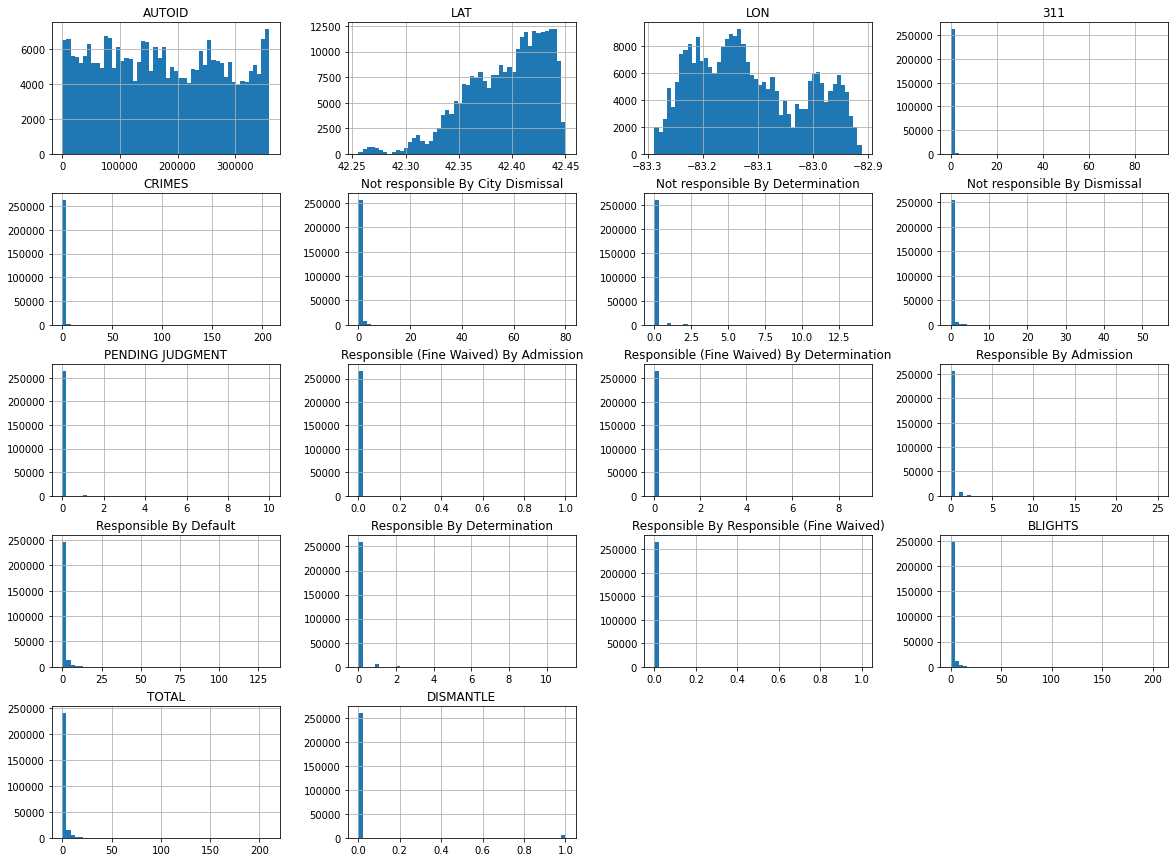

In [7]:
import matplotlib.pyplot as plt
crimes['DISMANTLE'] = crimes['DISMANTLE'].astype(int)
crimes.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
crimes.sort_values(by=['DISMANTLE'])

AUTOID        LAT        LON  311  CRIMES  \
0         1006  42.443916 -83.090808    0       0   
175476  240492  42.336702 -83.215267    0       2   
175477  240493  42.337289 -83.215305    0       1   
175478  240494  42.337475 -83.215321    0       0   
175479  240495  42.337593 -83.215333    0       0   
...        ...        ...        ...  ...     ...   
99079   131839  42.320935 -83.077594    0       0   
262988  355584  42.439880 -82.975778    0       1   
262976  355572  42.435270 -82.982166    0       7   
99166   131977  42.317201 -83.088159    0       0   
266860  359457  42.406938 -83.133767    0       0   

        Not responsible By City Dismissal  Not responsible By Determination  \
0                                       0                                 0   
175476                                  1                                 0   
175477                                  0                                 0   
175478                                  0                                 0   
175479                                  0                                 0   
...                                   ...                               ...   
99079                                   0                                 0   
262988                                  3                                 0   
262976                                  0                                 0   
99166                                   0                                 0   
266860                                  0                                 0   

        Not responsible By Dismissal  PENDING JUDGMENT  \
0                                  0                 0   
175476                             0                 0   
175477                             0                 0   
175478                             0                 0   
175479                             0                 0   
...                              ...               ...   
99079                              0                 0   
262988                             2                 0   
262976                             0                 0   
99166                              0                 0   
266860                             0                 0   

        Responsible (Fine Waived) By Admission  \
0                                            0   
175476                                       0   
175477                                       0   
175478                                       0   
175479                                       0   
...                                        ...   
99079                                        0   
262988                                       0   
262976                                       0   
99166                                        0   
266860                                       0   

        Responsible (Fine Waived) By Determination  Responsible By Admission  \
0                                                0                         1   
175476                                           0                         0   
175477                                           0                         0   
175478                                           0                         0   
175479                                           0                         0   
...                                            ...                       ...   
99079                                            0                         0   
262988                                           0                         0   
262976                                           0                         0   
99166                                            0                         0   
266860                                           0                         0   

        Responsible By Default  Responsible By Determination  \
0                            0                             0   
175476                       1     

In [9]:
crimes.describe()

AUTOID            LAT            LON            311  \
count  266861.000000  266861.000000  266861.000000  266861.000000   
mean   174169.435680      42.393761     -83.114423       0.073409   
std    105222.366371       0.037804       0.097863       0.423234   
min         1.000000      42.255716     -83.287402       0.000000   
25%     82375.000000      42.367703     -83.195786       0.000000   
50%    168111.000000      42.400992     -83.131176       0.000000   
75%    263629.000000      42.424790     -83.029857       0.000000   
max    359457.000000      42.450002     -82.911585      90.000000   

              CRIMES  Not responsible By City Dismissal  \
count  266861.000000                      266861.000000   
mean        0.446427                           0.146440   
std         1.912917                           0.716703   
min         0.000000                           0.000000   
25%         0.000000                           0.000000   
50%         0.000000                           0.000000   
75%         0.000000                           0.000000   
max       207.000000                          80.000000   

       Not responsible By Determination  Not responsible By Dismissal  \
count                     266861.000000                 266861.000000   
mean                           0.025710                      0.175503   
std                            0.198063                      0.697694   
min                            0.000000                      0.000000   
25%                            0.000000                      0.000000   
50%                            0.000000                      0.000000   
75%                            0.000000                      0.000000   
max                           14.000000                     54.000000   

       PENDING JUDGMENT  Responsible (Fine Waived) By Admission  \
count     266861.000000                           266861.000000   
mean           0.007967                                0.000004   
std            0.118306                                0.001936   
min            0.000000                                0.000000   
25%            0.000000                                0.000000   
50%            0.000000                                0.000000   
75%            0.000000                                0.000000   
max           10.000000                                1.000000   

       Responsible (Fine Waived) By Determination  Responsible By Admission  \
count                               266861.000000             266861.000000   
mean                                     0.002604                  0.052630   
std                                      0.068144                  0.325258   
min                                      0.000000                  0.000000   
25%                                      0.000000                  0.000000   
50%                                      0.000000                  0.000000   
75%                                      0.000000                  0.000000   
max                                      9.000000                 25.000000   

       Responsible By Default  Responsible By Determination  \
count           266861.000000                 266861.000000   
mean                 0.569454                      0.032819   
std                  1.698055                      0.237010   
min                  0.000000                      0.000000   
25%                  0.000000                      0.000000   
50%                  0.000000                      0.000000   
75%                  0.000000                      0.000000   
max                132.000000                     11.000000   

       Responsible By Responsible (Fine Waived)        BLIGHTS          TOTAL  \
count                             266861.000000  266861.000000  266861.000000   
mean                                   0.000011       1.013142       1.532978   
std                                    0.003353       2.665299       3.5298

<p style="text-align:justify"> I have seen that "Responsible (Fine Waived) By Admission" and "Responsible By Responsible (Fine Waived)" are almost empty columns.</p>
<p style="text-align:justify">I will remove them as they are not significative </p>

In [10]:
crimes.drop('Responsible (Fine Waived) By Admission', axis = 1, inplace=True)
crimes.drop('Responsible By Responsible (Fine Waived)', axis = 1, inplace=True)

<p style="font-size:18px; text-align:justify"> I save all records that have <span style="color:blue"> "dismantle = True" </span> for later </p>

In [11]:
dismantle_sub = crimes[crimes['DISMANTLE'] == True]

In [12]:
dismantle_sub['DISMANTLE'].describe()

count    4812.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: DISMANTLE, dtype: float64

<p style="font-size:18px; text-align:justify"> I import the sklearn library for creating the test and train splits from the initial crimes table </p>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
crimes['DISMANTLE'].describe()

count    266861.000000
mean          0.018032
std           0.133067
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DISMANTLE, dtype: float64

<p style="font-size:18px; text-align:justify"> I see that crimes has 266861 records, of which 262049 are False (the majority) </p>
<p style="font-size:18px; text-align:justify"> So, now I collect the sub_set of crimes with all <span style="color:blue"> Dismantle = False </span> </p>

In [15]:
crimes_false = crimes[crimes['DISMANTLE'] == False]

In [16]:
crimes_false['DISMANTLE'].describe()

count    262049.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: DISMANTLE, dtype: float64

In [17]:
train_set_temp, test_set = train_test_split(crimes_false, test_size=0.98164, random_state=42)

<p style="font-size:18px; text-align:justify"> I am using this random function not to create the final train and test subsets, but to collect a random subset of false dismantled buildings (with the same record number of the True subset, prepared before). </p>
<p style="font-size:18px; text-align:justify"> This False subset + the True subset will form my train+test set to train the variuos ML models.</p>
<p style="font-size:18px; text-align:justify"> The remaining subset (here called test_set) can be used to apply the models for the prediction of unknown labels, but it will not be part of any test set and I am not going to use it for the rest of the program </p>

In [18]:
# now I can create the "REAL" train_set by concatenating all true dismantled records and the random collection of 
#false records taken from crimes table
train_set = pd.concat([dismantle_sub,train_set_temp], ignore_index = True)

In [19]:
train_set.describe() 
#the train_set now includes all real True Dismantle + same amount of random False records taken from buildings

AUTOID          LAT          LON          311       CRIMES  \
count    9623.000000  9623.000000  9623.000000  9623.000000  9623.000000   
mean   233870.381170    42.388895   -83.101511     0.091344     0.566144   
std    123129.757781     0.038969     0.097428     0.757332     2.344380   
min        38.000000    42.257104   -83.287398     0.000000     0.000000   
25%    119953.500000    42.362094   -83.181981     0.000000     0.000000   
50%    260168.000000    42.394434   -83.111538     0.000000     0.000000   
75%    357051.500000    42.421743   -83.007287     0.000000     0.000000   
max    359457.000000    42.449617   -82.911659    65.000000   130.000000   

       Not responsible By City Dismissal  Not responsible By Determination  \
count                        9623.000000                       9623.000000   
mean                            0.293671                          0.044789   
std                             1.051871                          0.262239   
min                             0.000000                          0.000000   
25%                             0.000000                          0.000000   
50%                             0.000000                          0.000000   
75%                             0.000000                          0.000000   
max                            28.000000                          6.000000   

       Not responsible By Dismissal  PENDING JUDGMENT  \
count                   9623.000000       9623.000000   
mean                       0.366518          0.012782   
std                        1.045638          0.159057   
min                        0.000000          0.000000   
25%                        0.000000          0.000000   
50%                        0.000000          0.000000   
75%                        0.000000          0.000000   
max                       16.000000          6.000000   

       Responsible (Fine Waived) By Determination  Responsible By Admission  \
count                                 9623.000000               9623.000000   
mean                                     0.003845                  0.089473   
std                                      0.082101                  0.429378   
min                                      0.000000                  0.000000   
25%                                      0.000000                  0.000000   
50%                                      0.000000                  0.000000   
75%                                      0.000000                  0.000000   
max                                      4.000000                 12.000000   

       Responsible By Default  Responsible By Determination      BLIGHTS  \
count             9623.000000                   9623.000000  9623.000000   
mean                 1.182376                      0.065364     2.058817   
std                  2.714139                      0.356646     4.284697   
min                  0.000000                      0.000000     0.000000   
25%                  0.000000                      0.000000     0.000000   
50%                  0.000000                      0.000000     0.000000   
75%                  1.000000                      0.000000     3.000000   
max                 58.000000                     11.000000    82.000000   

             TOTAL    DISMANTLE  
count  9623.000000  9623.000000  
mean      2.716305     0.500052  
std       5.262567     0.500026  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       3.000000     1.000000  
max     134.000000     1.000000

In [20]:
train_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623 entries, 0 to 9622
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   AUTOID                                      9623 non-null   int64  
 1   LAT                                         9623 non-null   float64
 2   LON                                         9623 non-null   float64
 3   311                                         9623 non-null   int64  
 4   CRIMES                                      9623 non-null   int64  
 5   Not responsible By City Dismissal           9623 non-null   int64  
 6   Not responsible By Determination            9623 non-null   int64  
 7   Not responsible By Dismissal                9623 non-null   int64  
 8   PENDING JUDGMENT                            9623 non-null   int64  
 9   Responsible (Fine Waived) By Determination  9623 non-null   int64  
 10  Responsible 

In [21]:
evaluation_set = train_set 
#I rename the train_set as this will be our starting dataset to be 
#splitted again to form the final train and test sets
crimes_houses_set = test_set 
#the previous test_set, instead, remains the same but it is renamed for clarity and it will 
#be used for the model prediction analysis

<H3> Now we have:
  <ul>
      <li>an <span style="color:red">evaluation_set </span> containing 50% True 50% False Dismantled buildings and that will be splitted in <span style="color:blue">"train_set"</span> and <span style="color:green">"test_set"</span></li> 
    <li>a  <span style="color:red">crimes_houses_set </span> containing real data (with all False "Dismantle" labels) on which we are going to study the effectiveness of predictions of the models</li>
    <li>At this point we are going to forget for a moment about  <span style="color:red">crime_house_set</span> and we will 
       work only on the train and test sets</li>
    </ul>
</H3>

In [22]:
#finally we use again the sklearn function to split the evaluation set in train e test we are going to use 
#for the model
train_set, test_set = train_test_split(evaluation_set, test_size=0.2, random_state=42)

<H3 style="text-align:justify"> now we must see if the train set is respecting the statistical stratification of the entire population set (that in our case is the evaluation_set) this has to be checked to validate the training sample, especially when we have small datasets, as otherwise we might train our model using a non statistically representative sub_set </H3>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

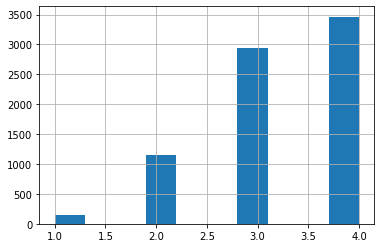

In [23]:
#we divide the set in regions within the range to better plot hystograms and see if the stratification is respected

train_set['LAT_CAT']=pd.cut(train_set['LAT'], bins=[42.25,42.3,42.35,42.4,42.45,42.5,np.inf], 
                                    labels=[1,2,3,4,5,6])
train_set['LAT_CAT'].hist()


<AxesSubplot:>

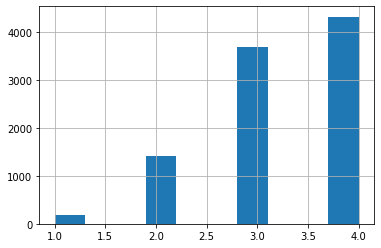

In [24]:
evaluation_set['LAT_CAT']=pd.cut(evaluation_set['LAT'], bins=[42.25,42.3,42.35,42.4,42.45,42.5,np.inf], 
                                    labels=[1,2,3,4,5,6])
evaluation_set['LAT_CAT'].hist()

In [25]:
#It seems the two dataset are consistent.
#Now let's do the same thing on the rest of columns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

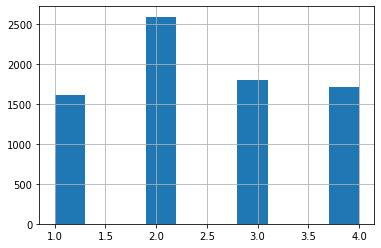

In [26]:
train_set['LON_CAT']=pd.cut(train_set['LON'], bins=[-83.3,-83.2,-83.1,-83.0,-82.9,np.inf], 
                                    labels=[1,2,3,4,5])
train_set['LON_CAT'].hist()

<AxesSubplot:>

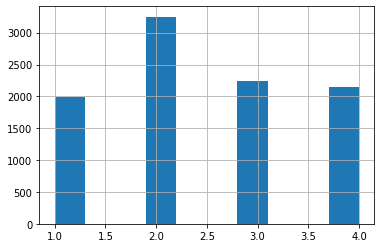

In [27]:
evaluation_set['LON_CAT']=pd.cut(evaluation_set['LON'], bins=[-83.3,-83.2,-83.1,-83.0,-82.9,np.inf], 
                                    labels=[1,2,3,4,5])
evaluation_set['LON_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

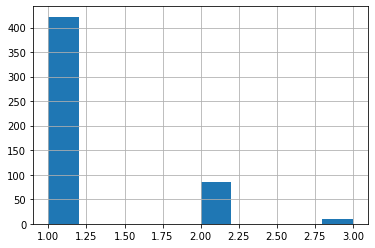

In [28]:
train_set['311_CAT']=pd.cut(train_set['311'], bins=[0.0,1.0,3.0,np.inf], 
                                    labels=[1,2,3])
train_set['311_CAT'].hist()

<AxesSubplot:>

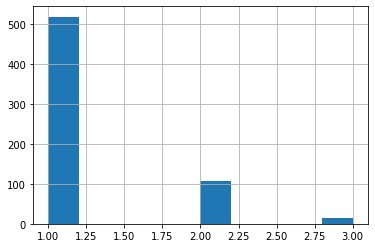

In [29]:
evaluation_set['311_CAT']=pd.cut(evaluation_set['311'], bins=[0.0,1.0,3.0,np.inf], 
                                    labels=[1,2,3])
evaluation_set['311_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

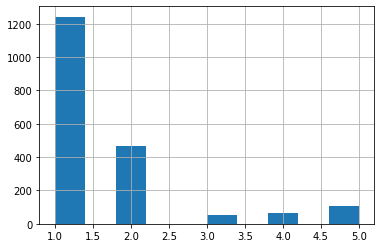

In [30]:
train_set['CRIMES_CAT']=pd.cut(train_set['CRIMES'], bins=[0.0,1.0,3.0,4.5,6.0,210,np.inf], 
                                    labels=[1,2,3,4,5,6])
train_set['CRIMES_CAT'].hist()

<AxesSubplot:>

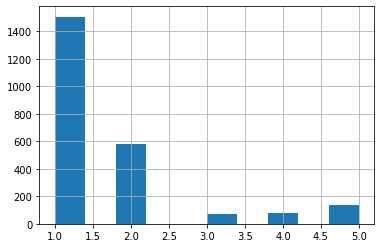

In [31]:
evaluation_set['CRIMES_CAT']=pd.cut(evaluation_set['CRIMES'], bins=[0.0,1.0,3.0,4.5,6.0,210,np.inf], 
                                    labels=[1,2,3,4,5,6])
evaluation_set['CRIMES_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

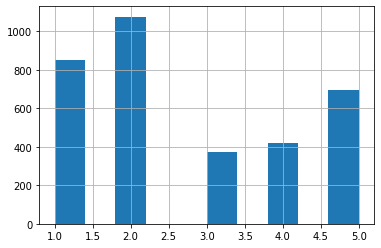

In [32]:
train_set['BLIGHTS_CAT']=pd.cut(train_set['BLIGHTS'], bins=[0.0,1.0,3.0,4.5,6.0,210,np.inf], 
                                    labels=[1,2,3,4,5,6])
train_set['BLIGHTS_CAT'].hist()

<AxesSubplot:>

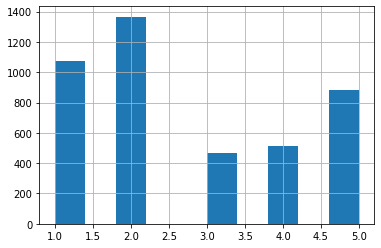

In [33]:
evaluation_set['BLIGHTS_CAT']=pd.cut(evaluation_set['BLIGHTS'], bins=[0.0,1.0,3.0,4.5,6.0,210,np.inf], 
                                    labels=[1,2,3,4,5,6])
evaluation_set['BLIGHTS_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

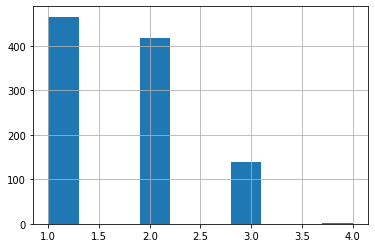

In [34]:
train_set['Not responsible By City Dismissal_CAT']=pd.cut(train_set['Not responsible By City Dismissal'], 
                                                      bins=[0.0,1.0,3.0,25.0,np.inf], labels=[1,2,3,4])
train_set['Not responsible By City Dismissal_CAT'].hist()

<AxesSubplot:>

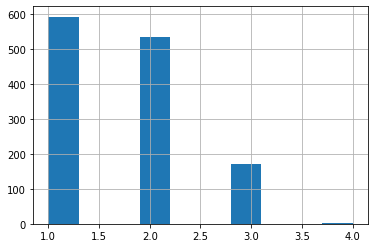

In [35]:
evaluation_set['Not responsible By City Dismissal_CAT']=pd.cut(evaluation_set['Not responsible By City Dismissal'], 
                                                      bins=[0.0,1.0,3.0,25.0,np.inf], labels=[1,2,3,4])
evaluation_set['Not responsible By City Dismissal_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

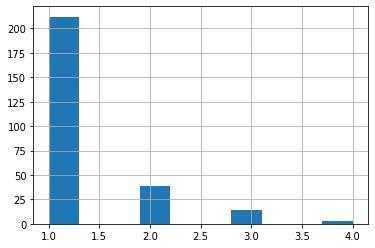

In [36]:
train_set['Not responsible By Determination_CAT']=pd.cut(train_set['Not responsible By Determination'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0,np.inf], labels=[1,2,3,4,5])
train_set['Not responsible By Determination_CAT'].hist()

<AxesSubplot:>

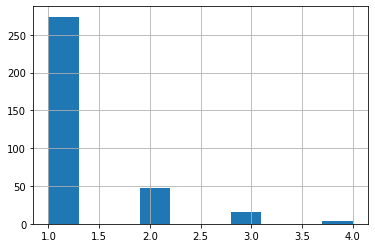

In [37]:
evaluation_set['Not responsible By Determination_CAT']=pd.cut(evaluation_set['Not responsible By Determination'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0,np.inf], labels=[1,2,3,4,5])
evaluation_set['Not responsible By Determination_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

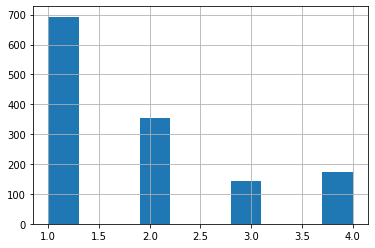

In [38]:
train_set['Not responsible By Dismissal_CAT']=pd.cut(train_set['Not responsible By Dismissal'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0], labels=[1,2,3,4])
train_set['Not responsible By Dismissal_CAT'].hist()

<AxesSubplot:>

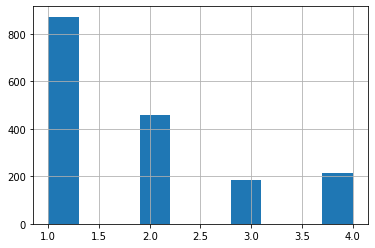

In [39]:
evaluation_set['Not responsible By Dismissal_CAT']=pd.cut(evaluation_set['Not responsible By Dismissal'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0], labels=[1,2,3,4])
evaluation_set['Not responsible By Dismissal_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

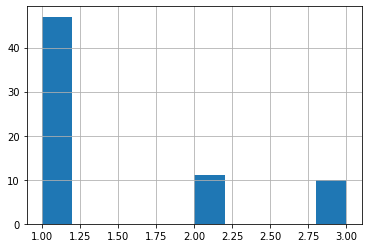

In [40]:
train_set['PENDING JUDGMENT_CAT']=pd.cut(train_set['PENDING JUDGMENT'], 
                                                      bins=[0.0,1.0,2.0,6.0], labels=[1,2,3])
train_set['PENDING JUDGMENT_CAT'].hist()

<AxesSubplot:>

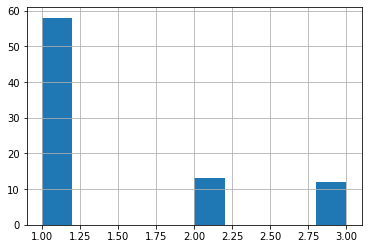

In [41]:
evaluation_set['PENDING JUDGMENT_CAT']=pd.cut(evaluation_set['PENDING JUDGMENT'], 
                                                      bins=[0.0,1.0,2.0,6.0], labels=[1,2,3])
evaluation_set['PENDING JUDGMENT_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

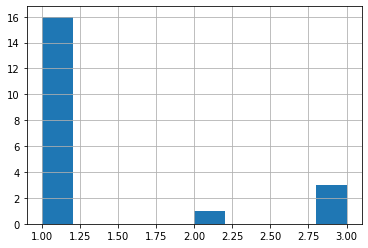

In [42]:
train_set['Responsible (Fine Waived) By Determination_CAT']=pd.cut(train_set['Responsible (Fine Waived) By Determination'], 
                                                      bins=[0.0,1.0,2.0,4.0], labels=[1,2,3])
train_set['Responsible (Fine Waived) By Determination_CAT'].hist()

<AxesSubplot:>

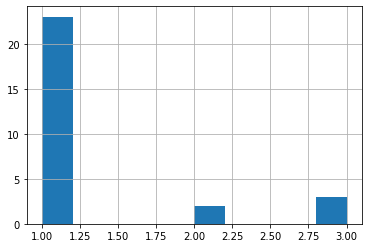

In [43]:
evaluation_set['Responsible (Fine Waived) By Determination_CAT']=pd.cut(evaluation_set['Responsible (Fine Waived) By Determination'], 
                                                      bins=[0.0,1.0,2.0,4.0], labels=[1,2,3])
evaluation_set['Responsible (Fine Waived) By Determination_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

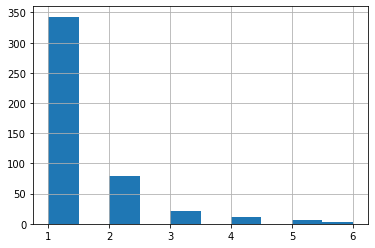

In [44]:
train_set['Responsible By Admission_CAT']=pd.cut(train_set['Responsible By Admission'], 
                                                      bins=[0.0,1.0,2.0,3.0,4.0,6.0,12.0], labels=[1,2,3,4,5,6])
train_set['Responsible By Admission_CAT'].hist()

<AxesSubplot:>

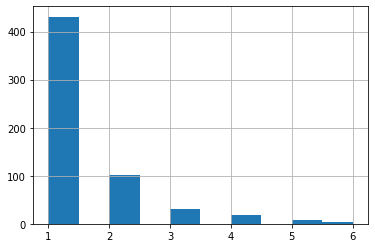

In [45]:
evaluation_set['Responsible By Admission_CAT']=pd.cut(evaluation_set['Responsible By Admission'], 
                                                      bins=[0.0,1.0,2.0,3.0,4.0,6.0,12.0], labels=[1,2,3,4,5,6])
evaluation_set['Responsible By Admission_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

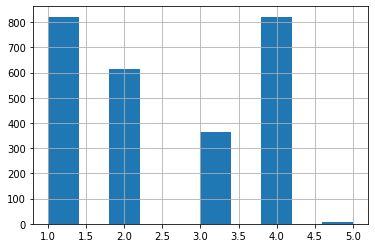

In [46]:
train_set['Responsible By Default_CAT']=pd.cut(train_set['Responsible By Default'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0,np.inf], labels=[1,2,3,4,5])
train_set['Responsible By Default_CAT'].hist()

<AxesSubplot:>

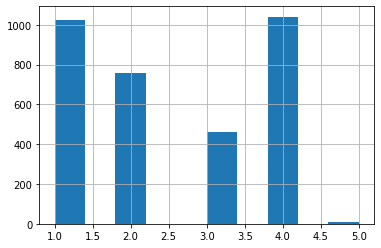

In [47]:
evaluation_set['Responsible By Default_CAT']=pd.cut(evaluation_set['Responsible By Default'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0,np.inf], labels=[1,2,3,4,5])
evaluation_set['Responsible By Default_CAT'].hist()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

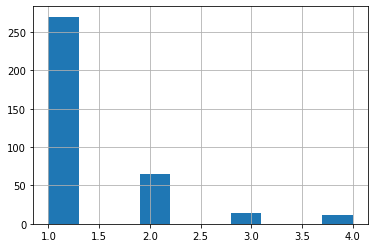

In [48]:
train_set['Responsible By Determination_CAT']=pd.cut(train_set['Responsible By Determination'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0,np.inf], labels=[1,2,3,4,5])
train_set['Responsible By Determination_CAT'].hist()

<AxesSubplot:>

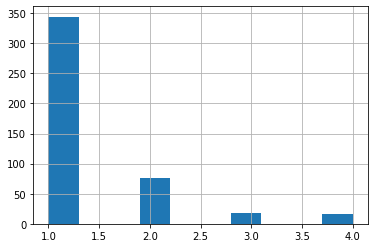

In [49]:
evaluation_set['Responsible By Determination_CAT']=pd.cut(evaluation_set['Responsible By Determination'], 
                                                      bins=[0.0,1.0,2.0,3.0,25.0,np.inf], labels=[1,2,3,4,5])
evaluation_set['Responsible By Determination_CAT'].hist()

# all stratifications of train_set seem to be conformal to the evaluation_set !

In [50]:
train_set.info()
#now I need to remove all categories from both evaluation_set and train_set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698 entries, 9197 to 7270
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   AUTOID                                          7698 non-null   int64   
 1   LAT                                             7698 non-null   float64 
 2   LON                                             7698 non-null   float64 
 3   311                                             7698 non-null   int64   
 4   CRIMES                                          7698 non-null   int64   
 5   Not responsible By City Dismissal               7698 non-null   int64   
 6   Not responsible By Determination                7698 non-null   int64   
 7   Not responsible By Dismissal                    7698 non-null   int64   
 8   PENDING JUDGMENT                                7698 non-null   int64   
 9   Responsible (Fine Waived) B

In [51]:
evaluation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623 entries, 0 to 9622
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   AUTOID                                          9623 non-null   int64   
 1   LAT                                             9623 non-null   float64 
 2   LON                                             9623 non-null   float64 
 3   311                                             9623 non-null   int64   
 4   CRIMES                                          9623 non-null   int64   
 5   Not responsible By City Dismissal               9623 non-null   int64   
 6   Not responsible By Determination                9623 non-null   int64   
 7   Not responsible By Dismissal                    9623 non-null   int64   
 8   PENDING JUDGMENT                                9623 non-null   int64   
 9   Responsible (Fine Waived) By D

In [52]:
drop_list=['LAT_CAT','LON_CAT','311_CAT','CRIMES_CAT','BLIGHTS_CAT','Not responsible By City Dismissal_CAT',
           'Not responsible By Determination_CAT','Not responsible By Dismissal_CAT',
           'PENDING JUDGMENT_CAT','Responsible (Fine Waived) By Determination_CAT','Responsible By Admission_CAT',
           'Responsible By Admission_CAT','Responsible By Default_CAT','Responsible By Determination_CAT']
train_set.drop(drop_list, axis = 1, inplace=True)
evaluation_set.drop(drop_list, axis = 1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:xlabel='LON', ylabel='LAT'>

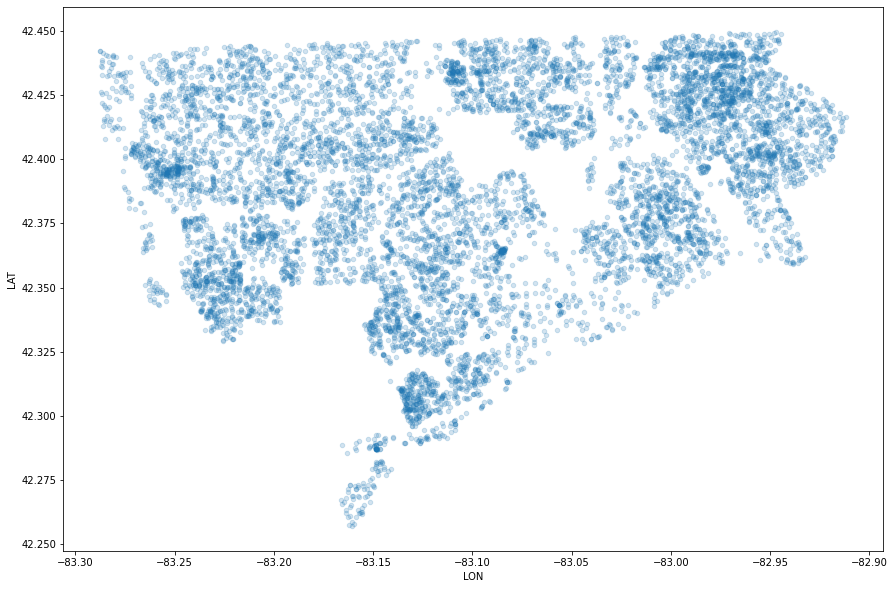

In [53]:
# now let's visualize some data to get some ideas
evaluation_set.plot(kind = 'scatter', x='LON', y='LAT', alpha=0.2, figsize=(14.7, 10))

<AxesSubplot:xlabel='LON', ylabel='LAT'>

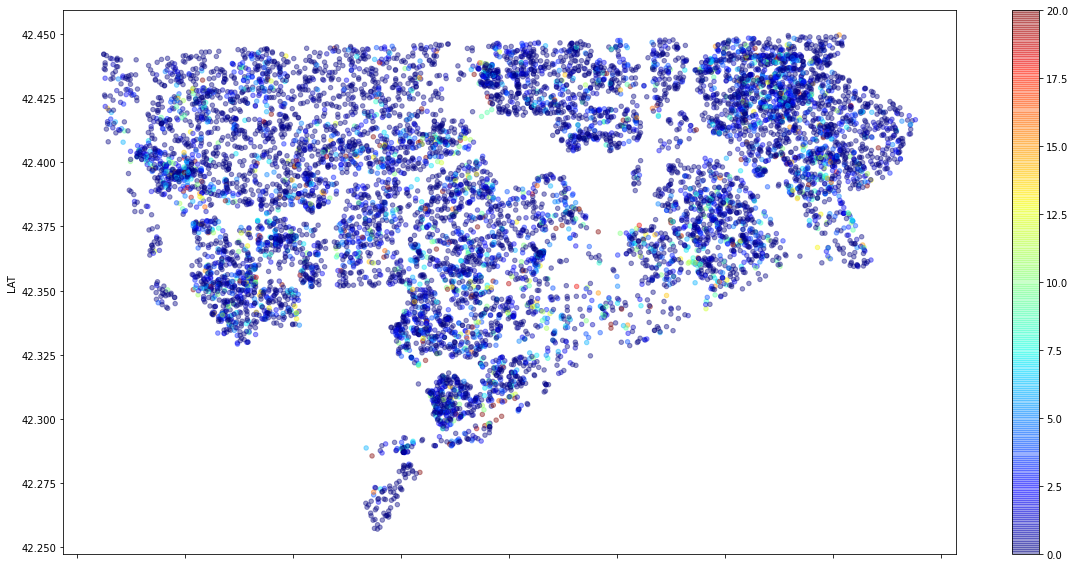

In [54]:
#let's see if there is some spatial localization of the blights incidents
from matplotlib import colors as colors 

evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.4, c=evaluation_set['BLIGHTS'], 
                    cmap=plt.get_cmap('jet'), figsize=(20, 10), vmin=0, vmax=20)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

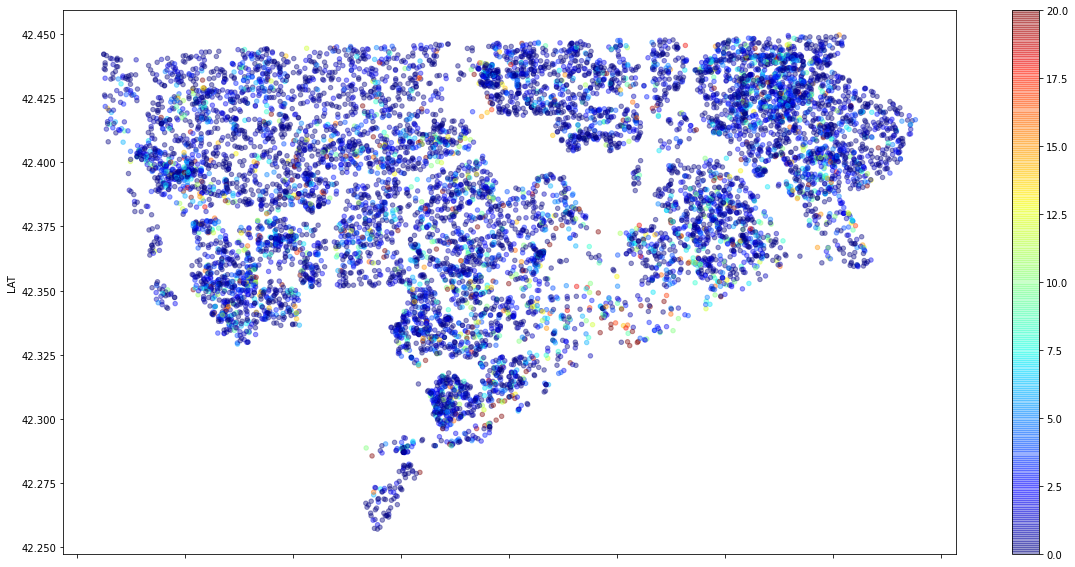

In [55]:
#let's do the same thing for the TOTAL number of crimes field
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.4, c=evaluation_set['TOTAL'], 
                    cmap=plt.get_cmap('jet'), figsize=(20, 10), vmin=0, vmax=20)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

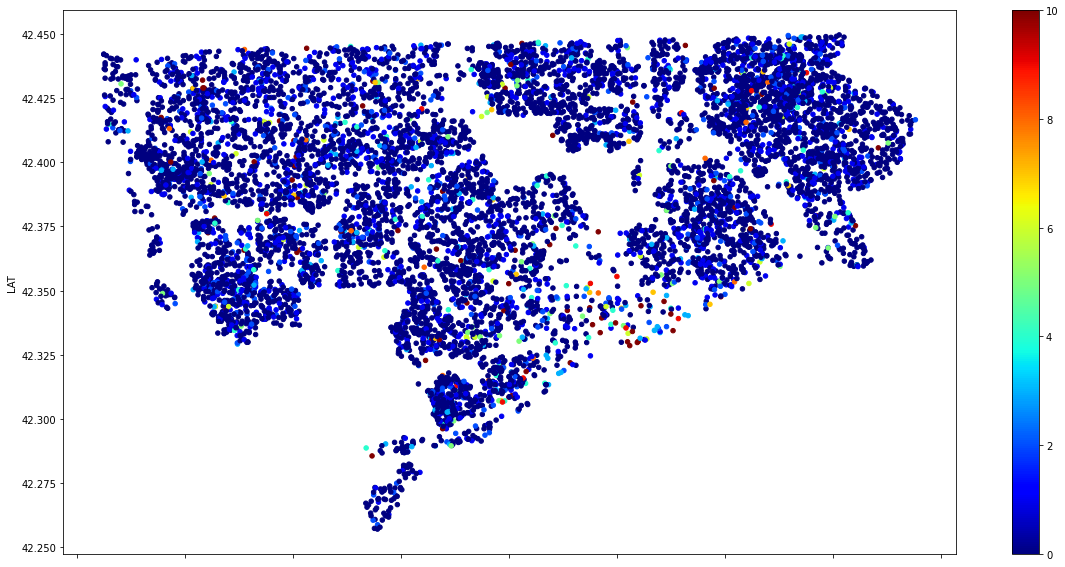

In [56]:
# of course, the TOTAL crimes number is dominated by the BLIGHTS, therefore the two scatters are very similar to each other
#let's do the same thing for the other columns
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=1.0, c=evaluation_set['CRIMES'], 
                    cmap=plt.get_cmap('jet'), figsize=(20, 10), vmin=0, vmax=10)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

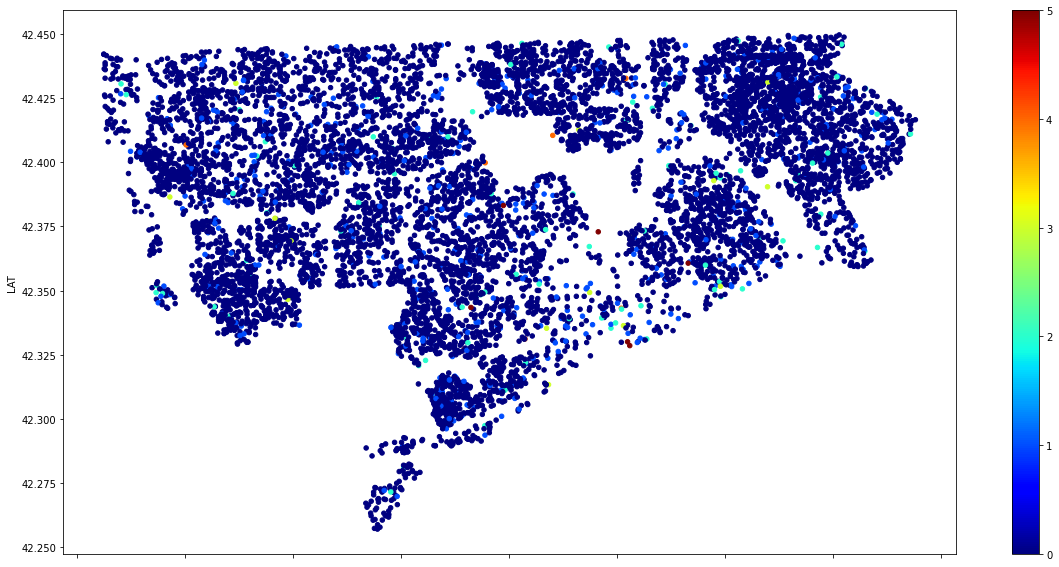

In [57]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=1.0, c=evaluation_set['311'], 
                    cmap=plt.get_cmap('jet'), figsize=(20, 10), vmin=0, vmax=5)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

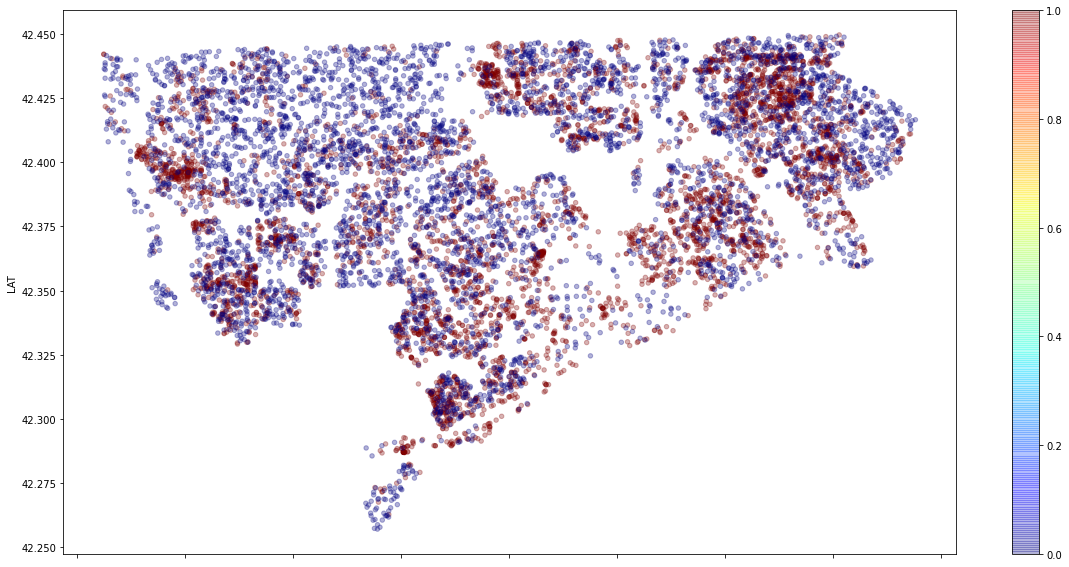

In [58]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.3, c=evaluation_set['DISMANTLE'], 
                    cmap=plt.get_cmap('jet'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

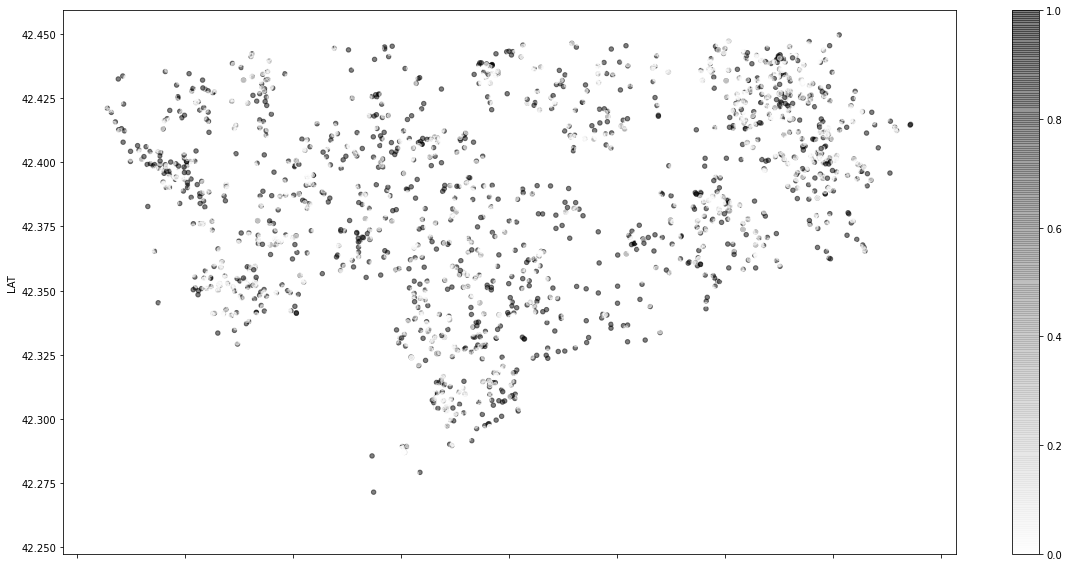

In [59]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Not responsible By City Dismissal'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

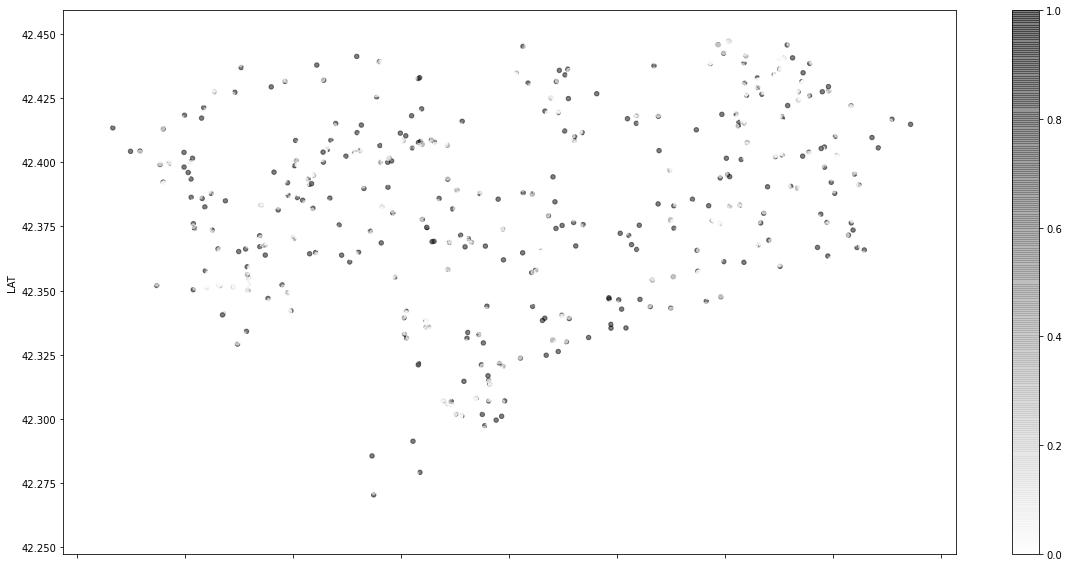

In [60]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Not responsible By Determination'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

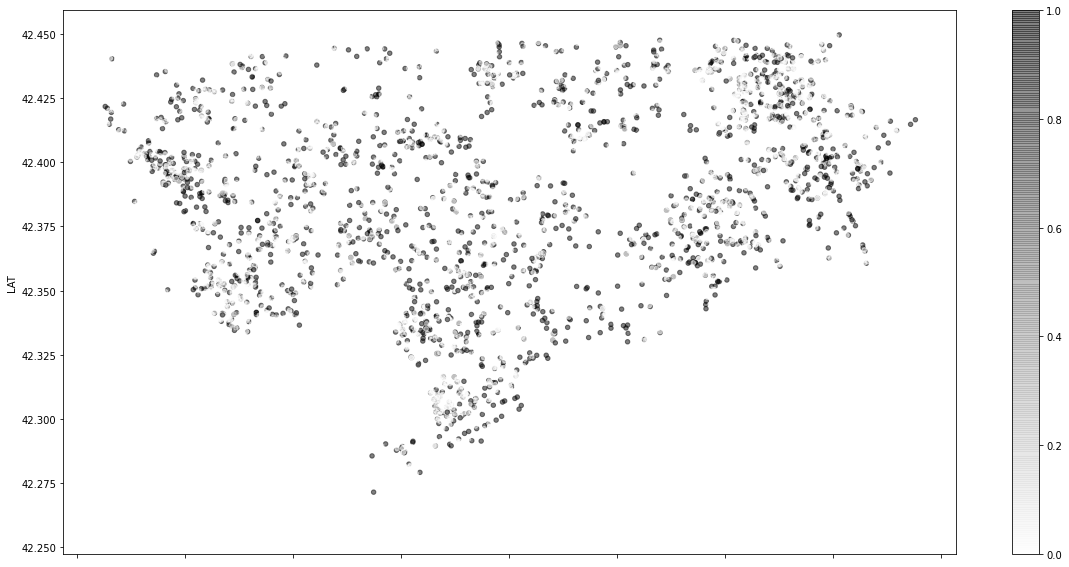

In [61]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Not responsible By Dismissal'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

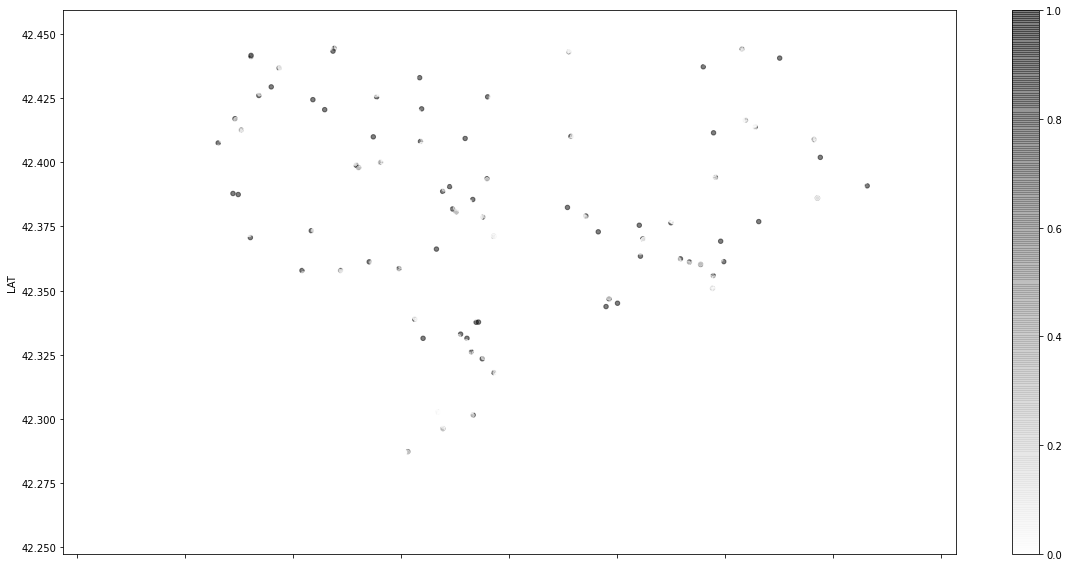

In [62]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['PENDING JUDGMENT'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

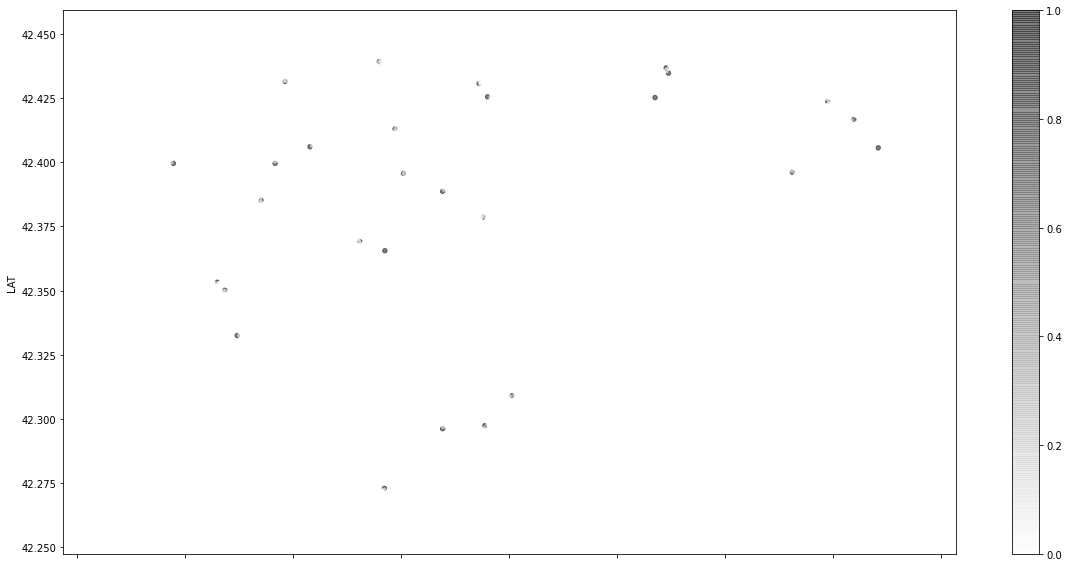

In [63]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Responsible (Fine Waived) By Determination'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

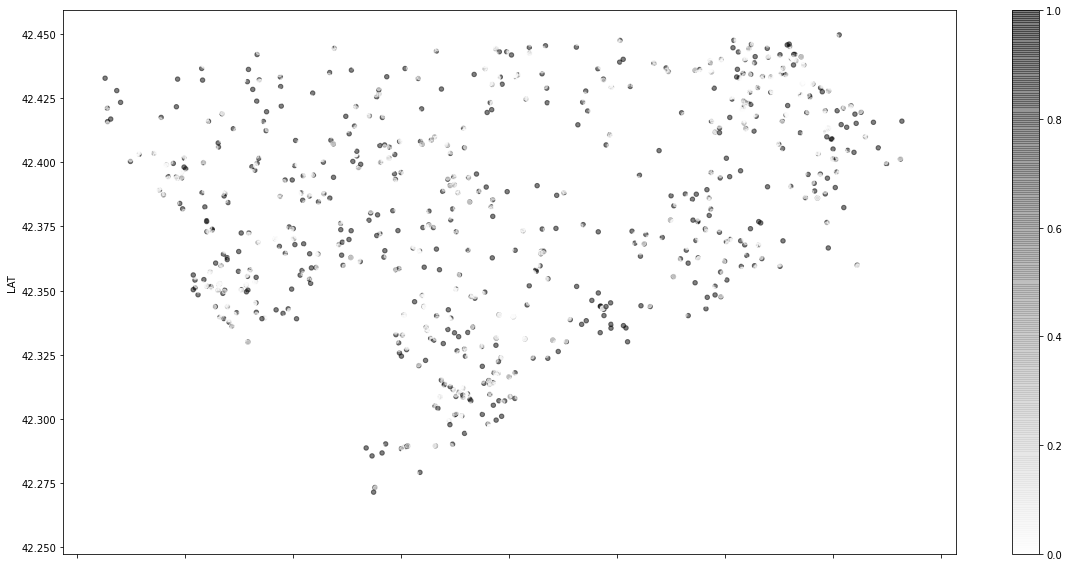

In [64]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Responsible By Admission'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

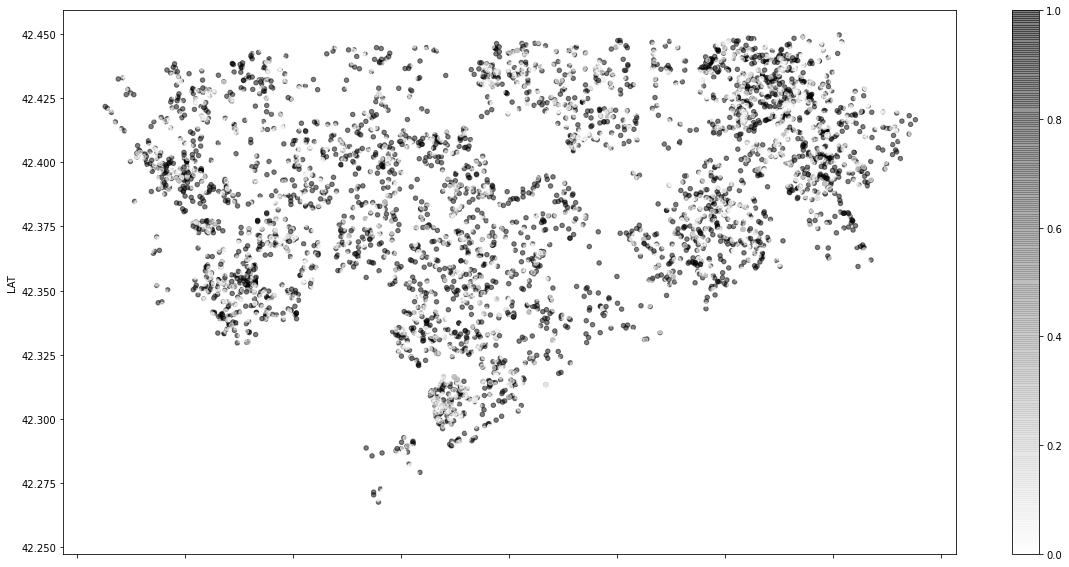

In [65]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Responsible By Default'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

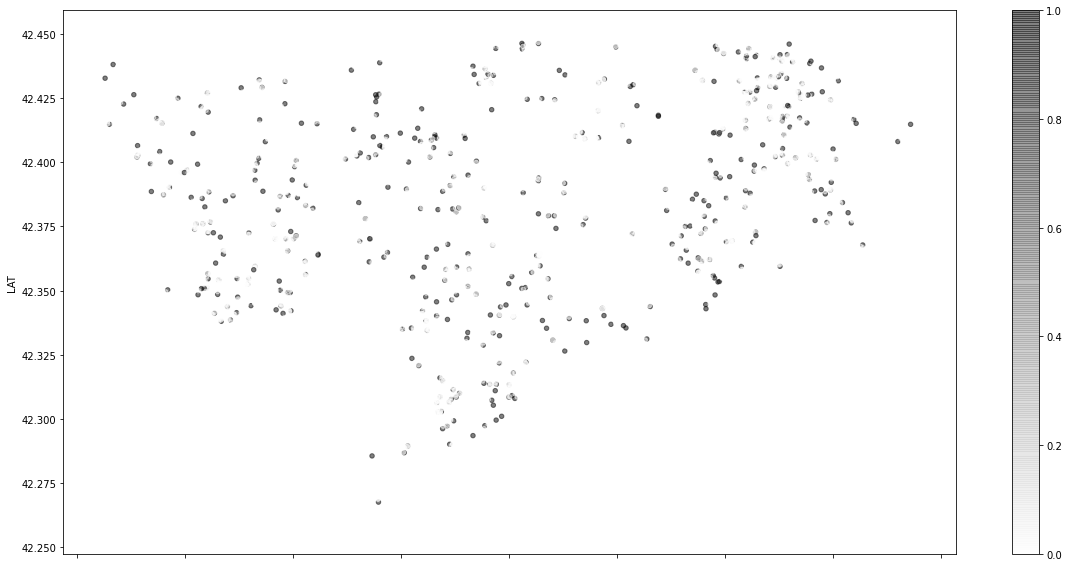

In [66]:
evaluation_set.plot(kind='scatter', x='LON', y='LAT', alpha=0.5, c=evaluation_set['Responsible By Determination'], 
                    cmap=plt.get_cmap('binary'), figsize=(20, 10), vmin=0, vmax=1)

In [67]:
#Now let's see if there is any linear correlation among the parameters
attributes = ['LAT', 'LON', '311', 'CRIMES', 'BLIGHTS','TOTAL','DISMANTLE','Not responsible By City Dismissal',
              'Not responsible By Determination','Not responsible By Dismissal','PENDING JUDGMENT',
              'Responsible (Fine Waived) By Determination','Responsible By Admission','Responsible By Default',
              'Responsible By Determination']
corr_matrix = train_set[attributes].corr()

In [68]:
corr_matrix

LAT       LON       311  \
LAT                                         1.000000  0.223801 -0.024857   
LON                                         0.223801  1.000000  0.003357   
311                                        -0.024857  0.003357  1.000000   
CRIMES                                     -0.056371  0.000006  0.066553   
BLIGHTS                                    -0.053606  0.000123  0.048224   
TOTAL                                      -0.072615  0.000628  0.225786   
DISMANTLE                                  -0.121568  0.109925  0.005111   
Not responsible By City Dismissal          -0.021419 -0.013865  0.015340   
Not responsible By Determination           -0.027052  0.000977  0.020144   
Not responsible By Dismissal               -0.038759  0.002057  0.041567   
PENDING JUDGMENT                           -0.014761  0.005075  0.023618   
Responsible (Fine Waived) By Determination -0.035898 -0.011905  0.006435   
Responsible By Admission                   -0.045737 -0.006674  0.037893   
Responsible By Default                     -0.044408  0.005090  0.040960   
Responsible By Determination               -0.031201  0.005074  0.021005   

                                              CRIMES   BLIGHTS     TOTAL  \
LAT                                        -0.056371 -0.053606 -0.072615   
LON                                         0.000006  0.000123  0.000628   
311                                         0.066553  0.048224  0.225786   
CRIMES                                      1.000000  0.136724  0.573670   
BLIGHTS                                     0.136724  1.000000  0.874916   
TOTAL                                       0.573670  0.874916  1.000000   
DISMANTLE                                   0.019281  0.254528  0.214536   
Not responsible By City Dismissal           0.072566  0.596403  0.515631   
Not responsible By Determination            0.038586  0.327587  0.284482   
Not responsible By Dismissal                0.107696  0.692829  0.613322   
PENDING JUDGMENT                            0.043178  0.215563  0.196883   
Responsible (Fine Waived) By Determination  0.066056  0.096342  0.108535   
Responsible By Admission                    0.121017  0.402684  0.385099   
Responsible By Default                      0.102905  0.902234  0.779712   
Responsible By Determination                0.100588  0.383302  0.357584   

                                            DISMANTLE  \
LAT                                         -0.121568   
LON                                          0.109925   
311                                          0.005111   
CRIMES                                       0.019281   
BLIGHTS                                      0.254528   
TOTAL                                        0.214536   
DISMANTLE                                    1.000000   
Not responsible By City Dismissal            0.134428   
Not responsible By Determination             0.064174   
Not responsible By Dismissal                 0.196056   
PENDING JUDGMENT                             0.023348   
Responsible (Fine Waived) By Determination   0.006413   
Responsible By Admission                     0.079763   
Responsible By Default                       0.237290   
Responsible By Determination                 0.092123   

                                            Not responsible By City Dismissal  \
LAT                                                                 -0.021419   
LON                                                                 -0.013865   
311                                                                  0.015340   
CRIMES                                                               0.072566   
BLIGHTS                                                              0.596403   
TOTAL                                                                0.515631   
DISMANTLE                                                            0.134428   
Not responsible By City Dismissal                     

array([[<AxesSubplot:xlabel='311', ylabel='311'>,
        <AxesSubplot:xlabel='CRIMES', ylabel='311'>,
        <AxesSubplot:xlabel='BLIGHTS', ylabel='311'>,
        <AxesSubplot:xlabel='TOTAL', ylabel='311'>,
        <AxesSubplot:xlabel='DISMANTLE', ylabel='311'>,
        <AxesSubplot:xlabel='Not responsible By City Dismissal', ylabel='311'>,
        <AxesSubplot:xlabel='Not responsible By Determination', ylabel='311'>,
        <AxesSubplot:xlabel='Not responsible By Dismissal', ylabel='311'>,
        <AxesSubplot:xlabel='PENDING JUDGMENT', ylabel='311'>,
        <AxesSubplot:xlabel='Responsible (Fine Waived) By Determination', ylabel='311'>,
        <AxesSubplot:xlabel='Responsible By Admission', ylabel='311'>,
        <AxesSubplot:xlabel='Responsible By Default', ylabel='311'>,
        <AxesSubplot:xlabel='Responsible By Determination', ylabel='311'>],
       [<AxesSubplot:xlabel='311', ylabel='CRIMES'>,
        <AxesSubplot:xlabel='CRIMES', ylabel='CRIMES'>,
        <AxesSubplot:xla

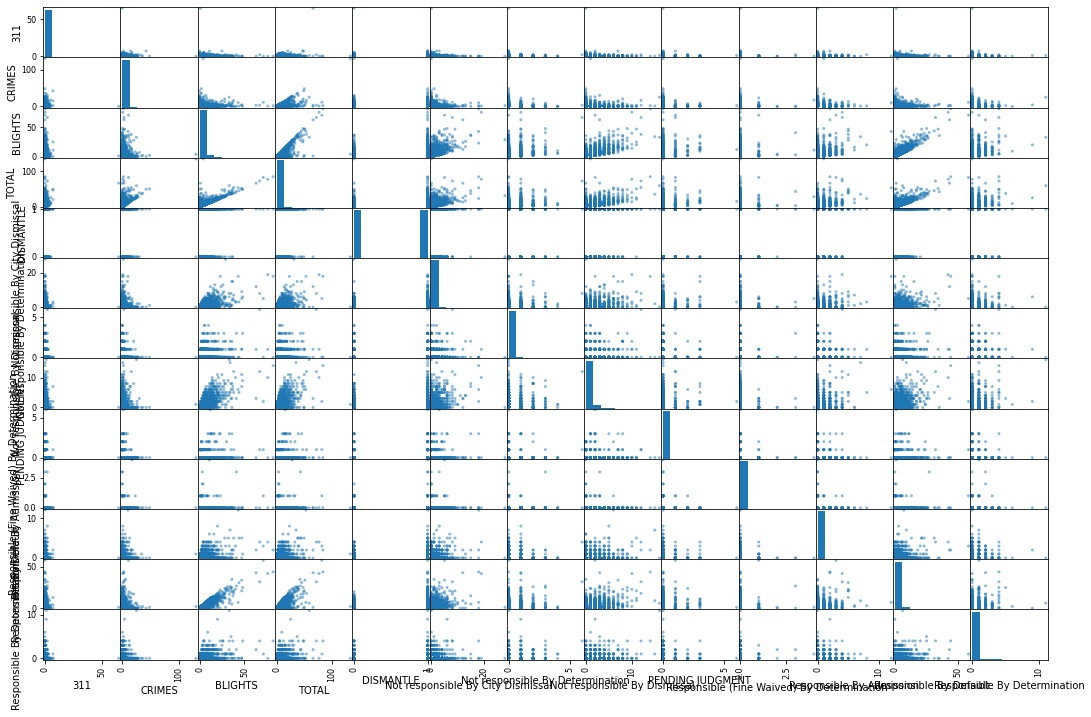

In [69]:
#another method to verify correlations, more fancy and useful for non-linear ones, with pandas
from pandas.plotting import scatter_matrix

#pandas doesn't plot boolean, conversion to integer needed
attributes = ['311', 'CRIMES', 'BLIGHTS','TOTAL','DISMANTLE','Not responsible By City Dismissal',
              'Not responsible By Determination','Not responsible By Dismissal','PENDING JUDGMENT',
              'Responsible (Fine Waived) By Determination','Responsible By Admission','Responsible By Default',
              'Responsible By Determination']

evaluation_set['DISMANTLE']=evaluation_set['DISMANTLE'].astype(int)

scatter_matrix(evaluation_set[attributes], figsize=(18,12))

<p style="font-size:18px; text-align:justify">From the scattermatrix it seems there are few interesting correlation to check in details. </p>
<p style="font-size:18px; text-align:justify">Let's dive into the details of scatter plots of the "DISMANTLE" label</p>

<AxesSubplot:xlabel='Responsible By Default', ylabel='DISMANTLE'>

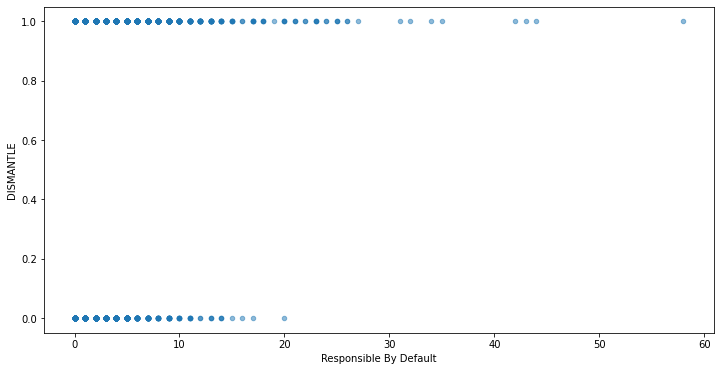

In [70]:
evaluation_set.plot(kind='scatter', x='Responsible By Default', y='DISMANTLE', alpha=0.5, 
                    cmap=plt.get_cmap('jet'), figsize=(12, 6))

<p style="font-size:18px; text-align:justify"> Indeed, from this plot, it seems that all buildings with more than 20 counts of <span style="color:blue"> "Responsible By Default </span>, have been dismantled. </p>
<p style="font-size:18px; text-align:justify"> Linear correlations is: 0.237290 </p>

<AxesSubplot:xlabel='Not responsible By Dismissal', ylabel='DISMANTLE'>

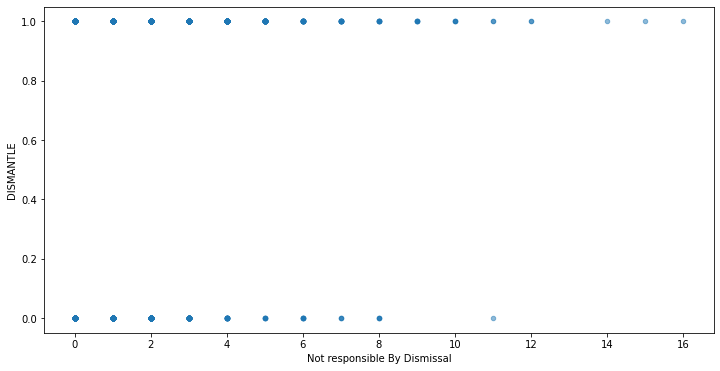

In [71]:
evaluation_set.plot(kind='scatter', x='Not responsible By Dismissal', y='DISMANTLE', alpha=0.5, 
                    cmap=plt.get_cmap('jet'), figsize=(12, 6))

<p style='font-size:18px; text-align:justify'> Also for this category, <span style='color:blue'> "Not responsible By Dismissal" </span>, it seems that buildings with a value higher than 11 have been dismantled </p>
<p style='font-size:18px; text-align:justify'> Linear correlation is: 0.196056 </p>

<AxesSubplot:xlabel='Not responsible By City Dismissal', ylabel='DISMANTLE'>

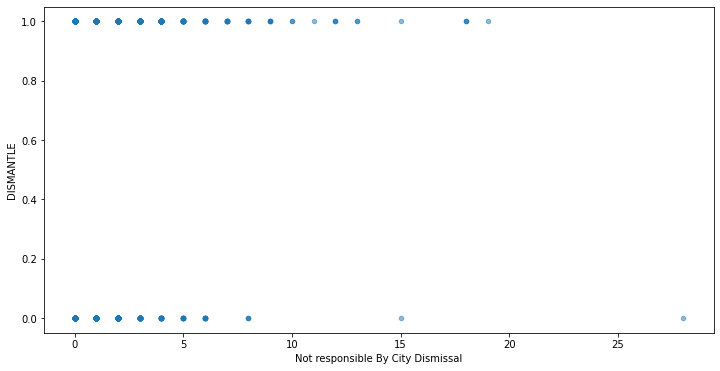

In [72]:
evaluation_set.plot(kind='scatter', x='Not responsible By City Dismissal', y='DISMANTLE', alpha=0.5, 
                    cmap=plt.get_cmap('jet'), figsize=(12, 6))

<p style="font-size:18px; text-align:justify"> in the case of <span style="color:blue"> "Not responsible By City Dismissal"</span> the correlation is unclear. </p>
<p style="font-size:18px; text-align:justify"> Linear correlation is: 0.134428</p>

In [73]:
#making a safety copy of the train set
train_set2 = train_set.copy()

<H3 style="text-align:center"> Now let's separate the labels from the training dataset </H3>

In [74]:
train_full = train_set2.drop("DISMANTLE", axis=1)
train_full_label = train_set2["DISMANTLE"].copy()

In [75]:
# FIRST OF ALL LET'S PREPARE THE SCALED DATASET TO BE USED LATER ON

#now we do the featuring rescale using the STANDARDIZATION method that should be less affected by the presence
# of outliers
#NOTE: this rescaling is to be made "only" on the training dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_full_scaled = scaler.fit_transform(train_full)

# ... and we use the best model from the previous analysis: Random Forest Cl.

<H2 style="font-size:24px; text-align:center"> Random Forest Classifier</H2>

In [76]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state = 42)

In [77]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score

In [78]:
random_clf_full_label_pred_scaled = cross_val_predict(random_clf, train_full_scaled , train_full_label, 
                                                        cv=5, method="predict")
random_clf_confusion_full_scaled = confusion_matrix(train_full_label, random_clf_full_label_pred_scaled)
print("Random Forest - Full Dataset - SCALED")
print("Precision: ", precision_score(train_full_label, random_clf_full_label_pred_scaled))
print("Recall: ", recall_score(train_full_label, random_clf_full_label_pred_scaled))
print("F1: ", f1_score(train_full_label, random_clf_full_label_pred_scaled))
random_clf_confusion_full_scaled

Random Forest - Full Dataset - SCALED
Precision:  0.8645441389290883
Recall:  0.7796919864265205
F1:  0.8199286302497942


array([[3399,  468],
       [ 844, 2987]])

<H2 style="text-align:center; color:red"> Precision-Accuracy Plots Threshold Fine Tuning </H2>

<H3 style="font-size:18px; text-align:justified">
now I am going to fine tune the thresholds of all other models in order to increase f1 and Recall values, keeping the Precision values about 90% (value chosen arbitrarily) 
</H3>

<H2 style="text-align:center">Random Forest Classifier</H2>

In [79]:

random_clf_full_scaled_proba = cross_val_predict(random_clf, train_full_scaled, train_full_label, cv=5, 
                                                   method="predict_proba")
random_clf_full_scaled_decision = random_clf_full_scaled_proba[:,1] #take column 1 of proba as decision scores

random_clf_precisions, random_clf_recalls, random_clf_thresholds = precision_recall_curve(train_full_label, 
                                                                                 random_clf_full_scaled_decision)
random_clf_f1 = 2*(random_clf_precisions*random_clf_recalls)/(random_clf_precisions+random_clf_recalls)

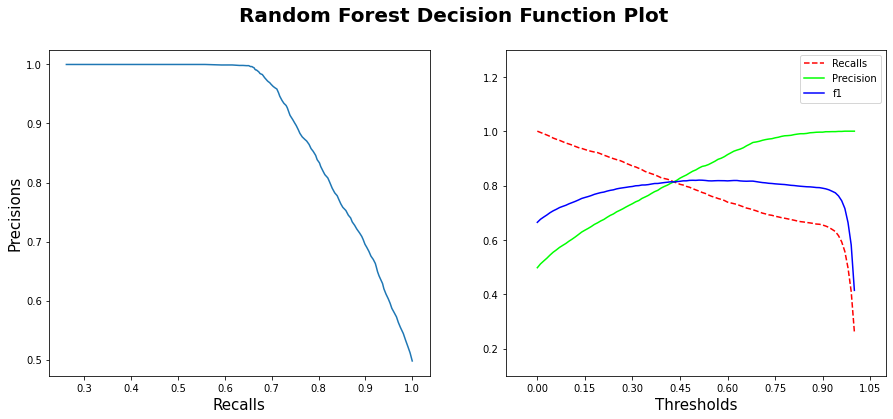

In [80]:
from matplotlib import ticker
tick_num = 8
yticks = ticker.MaxNLocator(tick_num)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Random Forest Decision Function Plot', color='black', fontweight="bold", size=20)
ax1.plot(random_clf_recalls[:-1], random_clf_precisions[:-1])
ax1.set_xlabel('Recalls', size=15)
ax1.set_ylabel('Precisions', size=15)

ax2.plot(random_clf_thresholds, random_clf_recalls[:-1], 'b--', color='red', label='Recalls')
ax2.plot(random_clf_thresholds, random_clf_precisions[:-1], 'b-', color='lime', label='Precision')
ax2.plot(random_clf_thresholds, random_clf_f1[:-1], 'b-', color='blue', label='f1')
ax2.set_xlabel('Thresholds', size=15)
ax2.legend(loc="upper right")
ax2.axis([-0.1,1.1,0.1,1.3]) 
ax2.xaxis.set_major_locator(yticks)

In [81]:
#optimised predictor 
random_clf_full_label_pred_optimised = (random_clf_full_scaled_decision > 0.57)

random_clf_confusion_full_scaled_opt = confusion_matrix(train_full_label, random_clf_full_label_pred_optimised)
print("Precision: ", precision_score(train_full_label, random_clf_full_label_pred_optimised))
print("Recall: ", recall_score(train_full_label, random_clf_full_label_pred_optimised))
print("F1: ", f1_score(train_full_label, random_clf_full_label_pred_optimised))
random_clf_confusion_full_scaled_opt

Precision:  0.9005334170065893
Recall:  0.7491516575306708
F1:  0.817896836705614


array([[3550,  317],
       [ 961, 2870]])

# Let's tune the hyperparameters of the Random Forest to see if we can improve F1

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# 'n_estimators’ is the number of trees in our random forest
random_clf_params = [{'max_features':[15], 'n_estimators':[950,1000]}]

random_clf_grid = GridSearchCV(random_clf, random_clf_params, cv=5, scoring='f1', return_train_score=True)

In [84]:
#fit model to training data
random_clf_grid.fit(train_full_scaled, train_full_label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [15],
                          'n_estimators': [950, 1000]}],
             return_train_score=True, scoring='f1')

In [85]:
#let's see the scores in details for each parameters combination:

grid_scores = random_clf_grid.cv_results_

for i in range(len(grid_scores['mean_test_score'])):
    print(grid_scores['mean_test_score'][i], grid_scores['params'][i])

0.8233171066721585 {'bootstrap': True, 'max_features': 15, 'n_estimators': 950}
0.8224135992292305 {'bootstrap': True, 'max_features': 15, 'n_estimators': 1000}


In [86]:
#Let's save the best Random Forest estimator
random_clf_best = random_clf_grid.best_estimator_
random_clf_best

RandomForestClassifier(max_features=15, n_estimators=950, random_state=42)

In [87]:
#.... and repeat the cross_val_predict and optimization steps with this new estimator

random_clf_best_full_scaled_proba = cross_val_predict(random_clf_best, train_full_scaled, train_full_label, cv=5, 
                                                   method="predict_proba")
random_clf_best_full_scaled_decision = random_clf_best_full_scaled_proba[:,1] #take column 1 of proba as decision scores

random_clf_best_precisions, random_clf_best_recalls, random_clf_best_thresholds = precision_recall_curve(train_full_label, 
                                                                                 random_clf_best_full_scaled_decision)
random_clf_best_f1 = 2*(random_clf_best_precisions*random_clf_best_recalls)/(random_clf_best_precisions+random_clf_best_recalls)


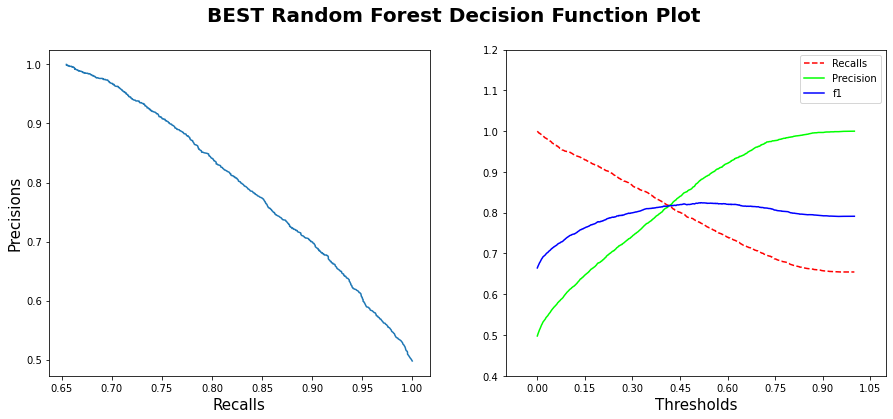

In [88]:
from matplotlib import ticker
tick_num = 8
yticks = ticker.MaxNLocator(tick_num)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('BEST Random Forest Decision Function Plot', color='black', fontweight="bold", size=20)
ax1.plot(random_clf_best_recalls[:-1], random_clf_best_precisions[:-1])
ax1.set_xlabel('Recalls', size=15)
ax1.set_ylabel('Precisions', size=15)

ax2.plot(random_clf_best_thresholds, random_clf_best_recalls[:-1], 'b--', color='red', label='Recalls')
ax2.plot(random_clf_best_thresholds, random_clf_best_precisions[:-1], 'b-', color='lime', label='Precision')
ax2.plot(random_clf_best_thresholds, random_clf_best_f1[:-1], 'b-', color='blue', label='f1')
ax2.set_xlabel('Thresholds', size=15)
ax2.legend(loc="upper right")
ax2.axis([-0.1,1.1,0.4,1.2]) 
ax2.xaxis.set_major_locator(yticks)

In [91]:
#I find the optimised threshold for the new best predictor 

random_clf_best_full_label_pred_optimised = (random_clf_best_full_scaled_decision > 0.555)

random_clf_best_confusion_full_scaled_opt = confusion_matrix(train_full_label, random_clf_best_full_label_pred_optimised)
print("Precision: ", precision_score(train_full_label, random_clf_best_full_label_pred_optimised))
print("Recall: ", recall_score(train_full_label, random_clf_best_full_label_pred_optimised))
print("F1: ", f1_score(train_full_label, random_clf_best_full_label_pred_optimised))
random_clf_best_confusion_full_scaled_opt

Precision:  0.9006828057107387
Recall:  0.7575045679979118
F1:  0.8229122359279738


array([[3547,  320],
       [ 929, 2902]])

# The overall performances increased slightly by using the best predictor

<H3 style="font-size:24px; text-align:center"> ROC CURVE</H3>

In [92]:
# ROC Curve is an important metric to plot True Positive Rate Vs. True Negative Rate of the various models. 
# TPR is ratio between True Positives and the total real positives instances (Recall)
# FPR instead is the ratio between False Positives predictions (negative instances mistaken as positive) and 
# the total real negative instances.   
# The better the model is the more the curve is pushed to the higher left edge. 
# This metric is useful to compare binary classifiers.

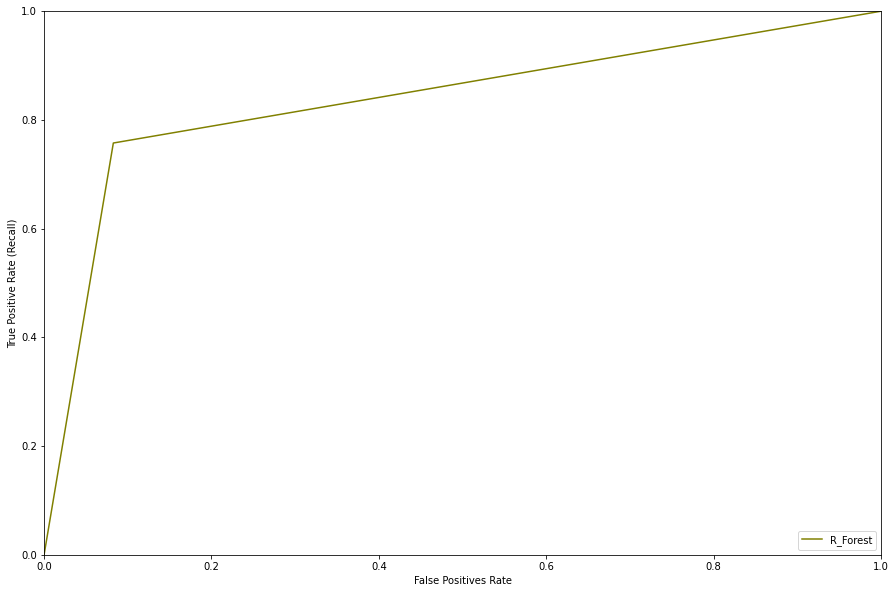

In [93]:
from sklearn.metrics import roc_curve

#sgd_clf_fpr, sgd_clf_tpr, sgd_clf_thresholds = roc_curve(train_blight_label, sgd_clf_blight_label_pred_optimised)
#ridge_clf_fpr, ridge_clf_tpr, ridge_clf_thresholds = roc_curve(train_blight_label, ridge_clf_blight_label_pred_optimised)
#SVM_clf_fpr, SVM_clf_tpr, SVM_clf_thresholds = roc_curve(train_blight_label, SVM_clf_blight_label_pred_optimised)
#log_reg_fpr, log_reg_tpr, log_reg_thresholds = roc_curve(train_blight_label, log_reg_blight_label_pred_optimised)
#KNN_clf_fpr, KNN_clf_tpr, KNN_clf_thresholds = roc_curve(train_blight_label, KNN_clf_blight_label_pred_optimised)
#tree_clf_fpr, tree_clf_tpr, tree_clf_thresholds = roc_curve(train_blight_label, tree_clf_blight_label_pred_optimised)
random_clf_best_fpr, random_clf_best_tpr, random_clf_best_thresholds = roc_curve(train_full_label, random_clf_best_full_label_pred_optimised)

plt.figure(figsize=(15,10))
#plt.plot(sgd_clf_fpr, sgd_clf_tpr, color='red', label='SGD')
#plt.plot(ridge_clf_fpr, ridge_clf_tpr, color='blue', label='RIDGE')
#plt.plot(SVM_clf_fpr, SVM_clf_tpr, color='lime', label='SVM')
#plt.plot(log_reg_fpr, log_reg_tpr, color='orange', label='LOG_REG')
#plt.plot(KNN_clf_fpr, KNN_clf_tpr, color='black', label='KNN')
#plt.plot(tree_clf_fpr, tree_clf_tpr, color='magenta', label='Dec_Tree')
plt.plot(random_clf_best_fpr, random_clf_best_tpr, color='olive', label='R_Forest')


plt.axis([0,1,0,1])
plt.xlabel('False Positives Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc="lower right")

# NOW LET'S WORK ON THE TEST SET

In [94]:
#extract the labels from the TEST_SET
test_set_data = test_set.drop("DISMANTLE", axis=1)
test_set_label = test_set["DISMANTLE"].copy()
test_set_label = test_set_label.astype(np.bool)
train_full_label = train_full_label.astype(np.bool)

In [106]:
#Let's use the optimised Random Forest model on the scaled test set
# scale TEST_SET 
test_set_data_scaled = scaler.fit_transform(test_set_data)

#I apply the FIT method to the scaled train dataset
#random_clf_best.fit(train_full_scaled, train_full_label)

# I predict the labels of the scaled TEST_SET
test_set_proba = random_clf_best.predict_proba(test_set_data_scaled)
test_set_decision = test_set_proba[:,1] #take column 1 of proba as decision scores
#And Apply the same optimisation of training set, to test_set
test_set_prediction = (test_set_decision > 0.555)

random_clf_confusion_test_set = confusion_matrix(test_set_label, test_set_prediction)
print("Random Forest - TEST Dataset - SCALED")
print("Precision: ", precision_score(test_set_label, test_set_prediction))
print("Recall: ", recall_score(test_set_label, test_set_prediction))
print("F1: ", f1_score(test_set_label, test_set_prediction))
random_clf_confusion_test_set

Random Forest - TEST Dataset - SCALED
Precision:  0.8905950095969289
Recall:  0.47298674821610603
F1:  0.6178428761651132


array([[887,  57],
       [517, 464]])